# What is differentiable programming?

Let's recall what a layer in a neural network *actually* is.

A layer is really just a **differentiable function** which takes in a vector of size `n` and spits out a new vector of size `m`.

That’s it! It just so often happens that this function is a simple matrix multiply or the application of a sigmoid.

With differentiable programming we utilize this generality.

> Differentiable programming **applies the techniques of deep learning to complex existing programs**, taking advantage of the huge amount of knowledge embedded within them. Deep learning, statistics, programming and the sciences all have something to say about modelling the world around us [...] .

(taken from [What is differentiable programming?](https://fluxml.ai/2019/02/07/what-is-differentiable-programming.html))

So, basically,

**Differentiable programming = Differentiate through any kind of code.**

# Neural Networks with ODE layers

Based on https://julialang.org/blog/2019/01/fluxdiffeq

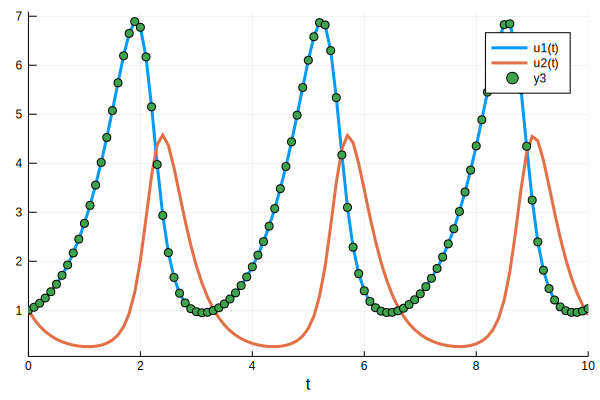

In [12]:
# using DifferentialEquations
using OrdinaryDiffEq
function lotka_volterra(du,u,p,t)
  x, y = u
  α, β, δ, γ = p
  du[1] = dx = α*x - β*x*y
  du[2] = dy = -δ*y + γ*x*y
end
u0 = [1.0,1.0]
tspan = (0.0,10.0)
p = [1.5,1.0,3.0,1.0]

# solve ODE
sol = solve(prob,Tsit5(),saveat=0.1)

# plot
using Plots
plot(sol)
A = sol[1,:] # length 101 vector
t = 0:0.1:10.0
scatter!(t,A)

In [16]:
# Build a neural network that sets the cost as the difference from the
# generated data and 1

p = param([2.2, 1.0, 2.0, 0.4]) # Initial Parameter Vector
function predict_rd() # Our 1-layer neural network
  diffeq_rd(p,prob,Tsit5(),saveat=0.1)[1,:]
end
loss_rd() = sum(abs2,x-1 for x in predict_rd()) # loss function

# Optimize the parameters so the ODE's solution stays near 1

data = Iterators.repeated((), 100)
opt = ADAM(0.1)
cb = function () #callback function to observe training
#   display(loss_rd())
  # using `remake` to re-create our `prob` with current parameters `p`
  display(plot(solve(remake(prob,p=Flux.data(p)),Tsit5(),saveat=0.1),ylim=(0,6)))
end
# Display the ODE with the initial parameter values.
cb()
Flux.train!(loss_rd, [p], data, opt, cb = cb)

### Neural ODE

In [11]:
using Flux, DiffEqFlux
diffeq_rd(p,prob,Tsit5(),saveat=0.1)

┌ Info: Recompiling stale cache file C:\Users\carsten\.julia\compiled\v1.1\Flux\QdkVy.ji for Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1184
┌ Info: Precompiling DiffEqFlux [aae7a2af-3d4f-5e19-a356-7da93b79d9d0]
└ @ Base loading.jl:1186


retcode: Success
Interpolation: 1st order linear
t: 101-element Array{Float64,1}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮  
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0
u: 101-element Array{Array{Float64,1},1}:
 [1.0, 1.0]         
 [1.06108, 0.821084]
 [1.14403, 0.679053]
 [1.24917, 0.566893]
 [1.37764, 0.478813]
 [1.53123, 0.410156]
 [1.71227, 0.357265]
 [1.92358, 0.317347]
 [2.16839, 0.288389]
 [2.45025, 0.269054]
 [2.77282, 0.258724]
 [3.13973, 0.257497]
 [3.5539, 0.26645]  
 ⋮                  
 [4.34617, 4.2047]  
 [3.24659, 4.54693] 
 [2.39567, 4.45777] 
 [1.81728, 4.06495] 
 [1.44276, 3.53974] 
 [1.20891, 2.99146] 
 [1.06859, 2.48207] 
 [0.991023, 2.03725]
 [0.957421, 1.66321]
 [0.956979, 1.35559]
 [0.983561, 1.10629]
 [1.03376, 0.906371]

Check out [DiffEqFlux.jl](https://github.com/JuliaDiffEq/DiffEqFlux.jl) for more information.

# Throwing stuff

Example taken/modified from [this amazing Flux blog post](https://fluxml.ai/2019/03/05/dp-vs-rl.html) - But don't look at it now unless you want to spoil things for you.

[Equations of motion](http://www.virtualtrebuchet.com/#documentation_EquationsOfMotion)

In [2]:
using Trebuchet

┌ Info: Recompiling stale cache file C:\Users\carsten\.julia\compiled\v1.1\Trebuchet\nIiFf.ji for Trebuchet [98b73d46-197d-11e9-11eb-69a6ff759d3a]
└ @ Base loading.jl:1184


HTML{String}("    <script id=\"webio-setup-18063561618153870791\">\n    // Immediately-invoked-function-expression to avoid global variables.\n    (function() {\n        var warning_div = document.getElementById(\"webio-warning-14011359447967525817\");\n        var hide = function () {\n            var script = document.getElementById(\"webio-setup-18063561618153870791\");\n            var parent = script && script.parentElement;\n            var grandparent = parent && parent.parentElement;\n            if (grandparent) {\n                grandparent.style.display = \"none\";\n            }\n            warning_div.style.display = \"none\";\n        };\n        if (typeof Jupyter !== \"undefined\") {\n            console.log(\"WebIO detected Jupyter notebook environment.\");\n            // Jupyter notebook.\n            var extensions = (\n                Jupyter\n                && Jupyter.notebook.config.data\n                && Jupyter.notebook.config.data.load_extensions\n            );\n            if (extensions && extensions[\"webio/main\"]) {\n                // Extension already loaded.\n                console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n                hide();\n                return;\n            }\n            console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n            require([\"/assetserver/7e432434d974e0d9c453715a0f592494740ca879-dist/main.js\"], function (webIOModule) {\n                webIOModule.load_ipython_extension();\n            });\n            warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n        } else if (window.location.pathname.includes(\"/lab\")) {\n            // Guessing JupyterLab\n            warning_div.innerHTML = \"WebIO does not support JupyterLab yet.\";\n        }\n    })();\n    </script>\n    <div\n        id=\"webio-warning-14011359447967525817\"\n        class=\"output_text output_stderr\"\n        style=\"padding: 1em; font-weight: bold;\"\n    >\n        Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n        <!-- TODO: link to installation docs. -->\n    </div>\n")

In [11]:
t = TrebuchetState()
simulate(t)

target = 100 # or nothing
s = visualise(t, target)

WebIO.Scope("scope-39bf8a7d-3b6e-4deb-bb61-55ab43cf2f7a", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol,Any}(:id=>"_container_"), 0), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}(), Set(String[]), nothing, ["C:\\Users\\carsten\\.julia\\packages\\Trebuchet\\dU16T\\assets\\js\\utils.js", "C:\\Users\\carsten\\.julia\\packages\\Trebuchet\\dU16T\\assets\\js\\animate.js", "C:\\Users\\carsten\\.julia\\packages\\Trebuchet\\dU16T\\assets\\css\\basic.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("(function (){createCanvas(\"scope-39bf8a7d-3b6e-4deb-bb61-55ab43cf2f7a\",\"main\"); createOutputBar(\"scope-39bf8a7d-3b6e-4deb-bb61-55ab43cf2f7a\",\"output\",{\"distance\":[0.0,\"m\"],\"height\":[0.0,\"m\"],\"time\":[0.0,\"m\"],\"wind_speed\":[1.0,\"m/s\"],\"target\":[100,\"m\"],\"release_angle\":[44.99999999999999,\"deg\"]}); return animate(\"scope-39bf8a7d-3b6e-4deb-bb61-55ab43cf2f7a\",\"main\",{\"a\":1.524,\"b\":2.0702016,\"c\":0.5334,\"d\":0.6096,\"e\":2.0826984,\"u\":0.8311896,\"z\":0.037947600000000005},{\"WeightCG\":[[0.36100903572858956,-0.21693215547703187],[0.36100903572858956,-0.21693215547703187],[0.36121169080754156,-0.21826469278794586],[0.36160626877022745,-0.22093699304505876],[0.36218188378492033,-0.22496236727324898],[0.36292728001748314,-0.23036013774467917],[0.363830503182816,-0.23715552725618172],[0.3648784778937668,-0.24537947672165983],[0.3660565171858164,-0.25506834641565734],[0.36734780045985344,-0.26626345094104703],[0.3687328664785807,-0.2790103784357236],[0.37018917737896506,-0.29335805181148567],[0.3716908156413523,-0.3093575043939808],[0.37320837591490047,-0.32706036351445295],[0.37470910504905564,-0.3465170610807403],[0.376157325125258,-0.3677748156896181],[0.3775151461429256,-0.39087545027069015],[0.3787434404287933,-0.41585311481724135],[0.3798030160902147,-0.442731966556288],[0.3798030160902148,-0.4427319665562891],[0.3798030160902148,-0.4427319665562891],[0.3798030160902148,-0.4427319665562891],[0.3798030160902148,-0.4427319665562891],[0.38065590130945604,-0.4715238097076727],[0.3812663642530947,-0.5022266626654668],[0.38160133670624774,-0.5348243481507587],[0.38163097239335414,-0.5692837678329253],[0.38132847396681235,-0.6055527805599876],[0.38066928663312904,-0.6435573521921102],[0.37962956884968146,-0.6831973909505742],[0.3781838273925885,-0.7243403995319455],[0.3763015202456066,-0.7668116044134247],[0.37394224417391664,-0.8103783832600879],[0.3710487575380456,-0.8547252441138968],[0.3675363860115458,-0.8994125731285745],[0.3632759853805865,-0.9438062721191148],[0.3580648818087381,-0.9869528000864847],[0.3515746972145897,-1.0273478808003513],[0.34325516991794036,-1.0624968647343795],[0.33216715741214914,-1.0881146445019299],[0.3168109082889655,-1.097163327749017],[0.2957013108677526,-1.0820464090197661],[0.2701860668226187,-1.047762061008717],[0.24387324978683028,-1.0099877697461463],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[0.2307189792496364,-0.9916666138533787],[

KeyError: KeyError: key "data" not found

# Aiming for a target

<img src="trebuchet-flow.png">

Here’s how it works: the neural net takes two inputs, the target distance in metres and the current wind speed. The network spits out trebuchet settings (the mass of the counterweight and the angle of release) that get fed into the simulator, which calculates the achieved distance. We then compare to our target, and backpropagate through the entire chain, end to end, to adjust the weights of the network. Our “dataset” is a randomly chosen set of targets and wind speeds.

In [61]:
using Zygote

In [15]:
# what you did in school
gradient(x -> 3x^2 + 2x + 1, 5)

(32,)

In [39]:
# something a little more advanced
gradient((wind, angle, weight) -> Trebuchet.shoot(wind, angle, weight),
         -2, 45, 200) # (4.02, -0.99, 0.051)

ErrorException: Output should be scalar; gradients are not defined for output (TrebuchetState(Trebuchet.Lengths{Float64}(1.524, 2.0702016, 0.5334, 0.6096, 2.0826984, 0.8311896, 0.037947600000000005), Trebuchet.Masses{Float64}(90.718474, 0.14877829736, 4.8307587405), Trebuchet.Angles{Float64}(-0.28270503955573967, 0.9534372877335943, 1.586370042507318), Trebuchet.AnglularVelocities{Float64}(-7.087362790643666, 11.082453936496464, -16.979788597428076), Trebuchet.Constants{Float64}(-2.0, 1.0, 1.0, 9.80665, 1.0177028497428946), Trebuchet.Inertias{Float64}(0.042140110093804806, 2.7288719786342384), Val{:End}(), 60.0, Trebuchet.Vec(57.3350301182608, -1.5239999999999818), Trebuchet.Vec(2.9467197742998628, -21.570876012524597), Solution(399)
, 3.855230753580327, Val{:Released}()), 57.3350301182608)

In [62]:
using ForwardDiff

# something a little more advanced
ForwardDiff.gradient(x -> Trebuchet.shoot(x...)[2],
         [-2, 45, 200]) # (wind, angle, weight) (4.02, -0.99, 0.051)

3-element Array{Float64,1}:
   4.217211790872836  
 -91.54573060729497   
   0.06075329378851328

In [64]:
using ReverseDiff

# something a little more advanced
ReverseDiff.gradient(x -> println(Trebuchet.shoot(x...)[2]),
         [-2.0, 45.0, 200.0]) # (wind, angle, weight) (4.02, -0.99, 0.051)

MethodError: MethodError: no method matching prevfloat(::ReverseDiff.TrackedReal{Float64,Float64,Nothing})
Closest candidates are:
  prevfloat(!Matched::BigFloat) at mpfr.jl:899
  prevfloat(!Matched::AbstractFloat) at float.jl:662
  prevfloat(!Matched::AbstractFloat, !Matched::Integer) at float.jl:654
  ...